In [2]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

Using TensorFlow backend.


# Data Preprocessing

In [5]:
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

data = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data["X_train"].shape

(3072, 10000)

In [3]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 5000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_5000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_5000["X_train"].shape

(3072, 45000)

In [4]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 1000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_1000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_1000["X_train"].shape

(3072, 49000)

# Exercise 1: Upgrade Assignment 2 code to train & test k-layer networks
## Check functions step by step

In [183]:
importlib.reload(mlp)
net = mlp.MLP(init=mlp.Initialization.XAVIER)
bs = 20
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [137]:
# net.layers[0].b

In [60]:
importlib.reload(mlp)
net = mlp.MLP(init=mlp.Initialization.XAVIER)
bs = 20
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 2.6225131126746075)

In [152]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check gradients
### 2 Layers network

In [90]:
importlib.reload(mlp)
bs, d = 1, 20
net = mlp.MLP(dims=[d, 50, 10], init=mlp.Initialization.XAVIER, batch_norm=False)
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([6.842173318640139e-09, 2.486442854455087e-10],
 [1.6587616452790045e-10, 5.641024873722951e-11],
 [4.899544291336755e-12, 4.539913783449534e-12],
 [5.9559019782023934e-12, 9.097046727024605e-12])

### 3 Layers network

In [156]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=3, dims=[d, 50, 50, 10])
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.3368991411420747e-10, 3.13794086334995e-11, 3.728708763838848e-08],
 [3.277285191419648e-11, 1.7059357153595256e-11, 4.537690730579009e-09],
 [1.6474903578086314e-11, 4.928498528733449e-12, 9.320475480139577e-12],
 [1.836612889549727e-11, 9.995704819409922e-12, 1.0905263736309123e-11])

### 4 Layers network

In [157]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=4, dims=[d, 50, 50, 50, 10])
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.6438928162612805e-10,
  2.9486854785275063e-10,
  2.4176841116217406e-10,
  2.0206190851572843e-07],
 [8.1919244006615e-11,
  1.4913519714159913e-10,
  5.787743618143555e-11,
  3.0974302288633016e-07],
 [1.9154730080718497e-11,
  7.383307039214061e-12,
  5.159364314830063e-12,
  9.74895465206761e-12],
 [2.1066222863352912e-11,
  1.72418975798172e-11,
  1.0931937785563228e-11,
  1.722620132717165e-11])

### Different batch sizes and lamdas

In [181]:
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]

for l in lambdas:
    for bs in batch_size:
        X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
        net = mlp.MLP(dims=[d, 50, 10], lamda=l, init=mlp.Initialization.XAVIER, batch_norm=False)
        P = net.forward_pass(X)
        net.compute_gradients(X, Y, P)
        rerr_w, rerr_b, aerr_w, aerr_b = net.compare_gradients(X, Y, h=1e-5, eps=1e-6)
        print(f'Batch size: {bs} - Lambda {l}->\n relative_error on gWs {rerr_w} \n relative_error on gbs {rerr_b} \n absolute error on gWs {aerr_w} \n absolute error on gbs {aerr_b}   ')

Batch size: 1 - Lambda 0->
 relative_error on gWs [2.534100858988858e-10, 1.0982245617702531e-10] 
 relative_error on gbs [6.752789597524107e-11, 3.574998985584907e-11] 
 absolute error on gWs [3.3554197890789567e-12, 3.1799358667095047e-12] 
 absolute error on gbs [3.801446969708966e-12, 7.1245301325184585e-12]   
Batch size: 32 - Lambda 0->
 relative_error on gWs [2.113299441341759e-09, 8.981601123671104e-10] 
 relative_error on gbs [1.4739882352388053e-09, 1.8197502060383747e-10] 
 absolute error on gWs [1.095818874775553e-11, 1.1769664245053942e-11] 
 absolute error on gbs [1.2354949151152216e-11, 1.0315960585760565e-11]   
Batch size: 64 - Lambda 0->
 relative_error on gWs [1.7592318657131067e-09, 2.0407567549093274e-09] 
 relative_error on gbs [9.861834670471749e-10, 1.521921250419527e-10] 
 absolute error on gWs [1.1674283701258812e-11, 1.2017577492188581e-11] 
 absolute error on gbs [1.0090653840928373e-11, 1.0616754177183995e-11]   
Batch size: 100 - Lambda 0->
 relative_error

## Try to train the network with mini batch gd

In [163]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0, init=mlp.Initialization.XAVIER)
data_100 = {"X_train": data["X_train"][:,:100], "y_train": data["y_train"][:100], "Y_train": data["Y_train"][:,:100], "X_val":data["X_val"][:,:100], "y_val": data["y_val"][:100], "Y_val": data["Y_val"][:,:100]}
GDparams = {"n_batch":100, "n_epochs":200, "eta":1e-3, "exp":"test_grad"}
net.mini_batch_gd(data_100, GDparams, verbose=True, backup=True)

 | train_loss=1.6814181158523251 | val_loss=2.3418572632798287 | train_cost=1.6814181158523251 | val_cost=2.3418572632798287
 44%|████▍     | 89/200 [00:03<00:04, 26.61it/s]Epoch 83: train_acc=0.55 | val_acc=0.11 | train_loss=1.6754708866561137 | val_loss=2.341424768906559 | train_cost=1.6754708866561137 | val_cost=2.341424768906559
Epoch 84: train_acc=0.56 | val_acc=0.11 | train_loss=1.6695753636044282 | val_loss=2.3410634732754643 | train_cost=1.6695753636044282 | val_cost=2.3410634732754643
Epoch 85: train_acc=0.56 | val_acc=0.11 | train_loss=1.6637405929035536 | val_loss=2.3406739369301808 | train_cost=1.6637405929035536 | val_cost=2.3406739369301808
Epoch 86: train_acc=0.56 | val_acc=0.11 | train_loss=1.6578588482329395 | val_loss=2.3403827798223755 | train_cost=1.6578588482329395 | val_cost=2.3403827798223755
Epoch 87: train_acc=0.58 | val_acc=0.11 | train_loss=1.6520166560966851 | val_loss=2.339872211401996 | train_cost=1.6520166560966851 | val_cost=2.339872211401996
Epoch 88: t

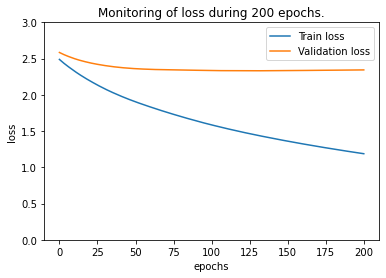

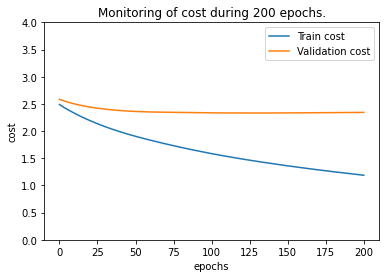

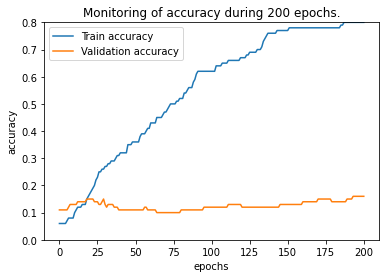

In [164]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)

# Exercise 2: Can I train multi-layer networks?
## Replicate results of assignement 2 Figure 3

In [165]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.01, batch_norm=False, init=mlp.Initialization.XAVIER, seed=42)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net.cyclic_learning(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:42<00:00,  4.21s/it]


In [54]:
net.layers[0].activation

<function mlp.relu(x)>

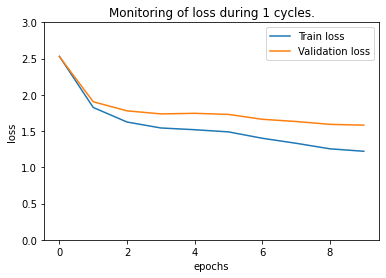

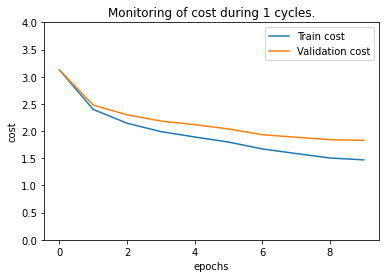

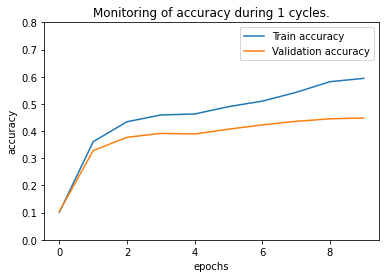

In [166]:
importlib.reload(mlp)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [167]:
net.compute_accuracy(data["X_test"], data["y_test"])

0.457

## Replicate results of assignement 2 Figure 4

In [189]:
importlib.reload(mlp)
net2 = mlp.MLP(lamda=.01, batch_norm=False, init=mlp.Initialization.XAVIER, seed=42)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":9, "exp":"rep4"}
net2.cyclic_learning(data, GDparams, verbose=True, backup=True)

 33%|███▎      | 16/48 [00:49<01:41,  3.17s/it]Update Step 1593: train_acc=0.6459 | val_acc=0.4621 | train_loss=1.0946831849941658 | val_loss=1.5533300911639747 | train_cost=1.3433961714908118 | val_cost=1.8020430776606207
Update Step 0: train_acc=0.6468 | val_acc=0.4622 | train_loss=1.0944463512244245 | val_loss=1.5529560444315613 | train_cost=1.343158202407482 | val_cost=1.8016678956146188
 67%|██████▋   | 32/48 [01:36<00:51,  3.21s/it]Update Step 1593: train_acc=0.6958 | val_acc=0.4682 | train_loss=0.9835328967976383 | val_loss=1.5474776568592765 | train_cost=1.2703811130155986 | val_cost=1.834325873077237
Update Step 0: train_acc=0.6965 | val_acc=0.4676 | train_loss=0.9832624992235236 | val_loss=1.5472642333770366 | train_cost=1.2701144521045404 | val_cost=1.8341161862580533
100%|██████████| 48/48 [02:22<00:00,  2.97s/it]Update Step 1593: train_acc=0.7163 | val_acc=0.4699 | train_loss=0.9434564727923376 | val_loss=1.53955802650958 | train_cost=1.2510390614092057 | val_cost=1.847140

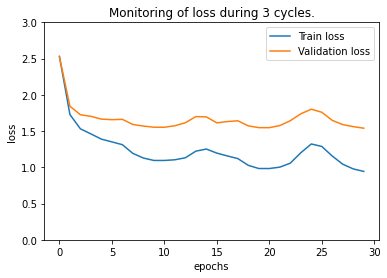

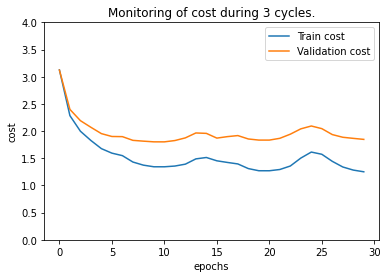

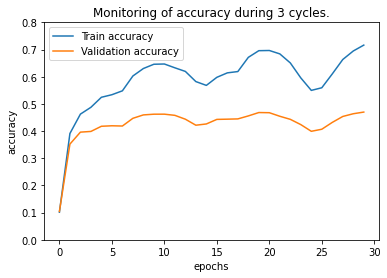

In [190]:
importlib.reload(mlp)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":9, "exp":"rep4"}
net2 = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net2.plot_metric(GDparams, metric="loss")
net2.plot_metric(GDparams, metric="cost")
net2.plot_metric(GDparams, metric="accuracy")

In [191]:
net2.compute_accuracy(data['X_test'], data['y_test'])

0.4733

## Train a 3-layers network

100%|██████████| 20/20 [04:27<00:00, 13.37s/it]


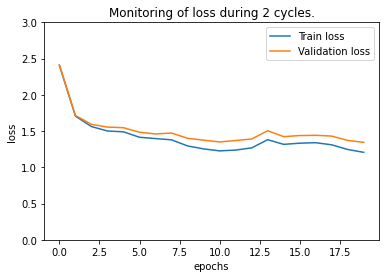

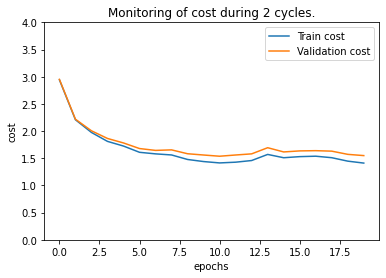

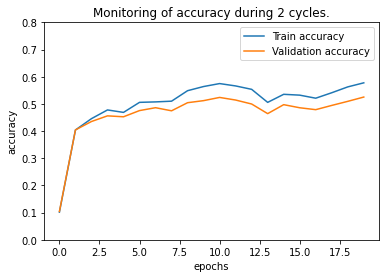

In [192]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10], batch_norm=False, init=mlp.Initialization.XAVIER, seed=42)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay3"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [193]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5335

## Train a 9-layers network with HE

100%|██████████| 20/20 [04:29<00:00, 13.48s/it]


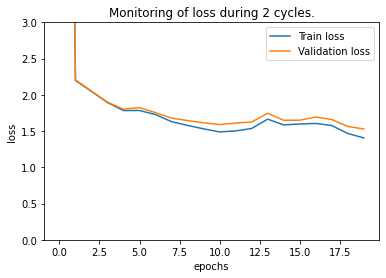

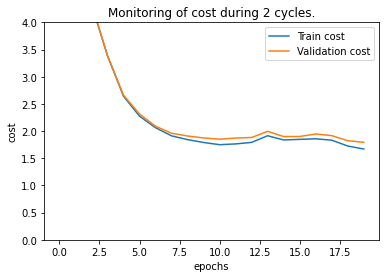

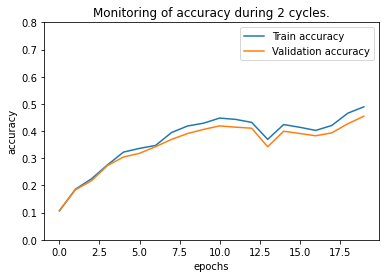

In [194]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [196]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.4635

## Train a 9-layers network with XAVIER

100%|██████████| 20/20 [04:08<00:00, 12.42s/it]


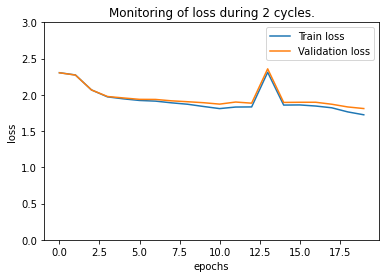

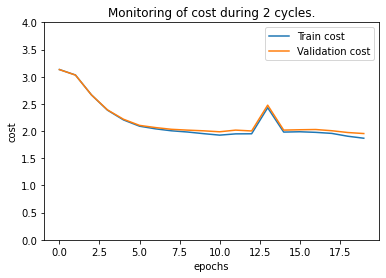

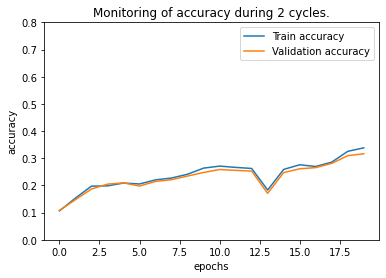

In [261]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10], init=mlp.Initialization.XAVIER)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay9_xavier"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [263]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.3289

# Exercise 3: Implement batch normalization
## Check functions step by step

In [83]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, train_mode=True)
P.shape

(10, 20)

In [64]:
net.layers

In [6]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = data["X_train"][:, :bs], data["Y_train"][:, :bs]
c = net.compute_cost(X, Y, train_mode=True)
c

(3.143543966956824, 3.143543966956824)

In [9]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
d, bs = 10, 2
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, init=True)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check the gradients

In [104]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True, init=mlp.Initialization.XAVIER)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, init=True, train_mode=True)
net.compute_gradients(X, Y, P)

(50, 20)
(50, 20)


In [98]:
net.layers[-1].grad_b

array([[-0.03295361],
       [-0.10300647],
       [-0.03267594],
       [ 0.06030202],
       [ 0.01383997],
       [-0.01830687],
       [ 0.03809533],
       [ 0.06218479],
       [-0.04638758],
       [ 0.05890834]])

In [11]:
importlib.reload(mlp)
d, bs = 10, 5
net = mlp.MLP(k=3, dims=[d, 50, 50,10], batch_norm=True)
X, Y = data["X_train"][:d, :bs], data["Y_train"][:d, :bs]
P = net.forward_pass(X, init=True)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6, fun=np.max)

([1.0, 1.0, 3.087828785093782e-08],
 [0.1141916132363926, 0.044668295576981515, 4.2050710136187774e-11],
 [2.2204549310345097e-05, 5.551115123125783e-11, 7.669101967616331e-10],
 [2.2204549310345096e-11, 5.551115123125783e-17, 3.8326286588841185e-11],
 [1.0, 1.2888991893789367e-08],
 [0.040258433941856145, 3.651365321211131e-11],
 [1.0, 1.0],
 [28237.996675809285, 90542.38849635622])

# Training with Batch normalization
## 3 Layer network with 50 50 nodes

100%|██████████| 20/20 [04:50<00:00, 14.53s/it]


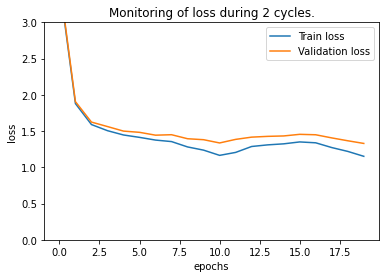

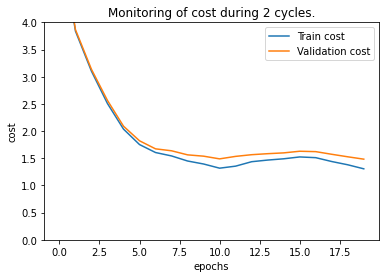

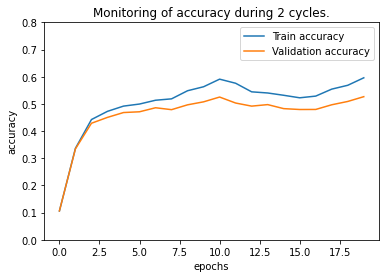

In [117]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"bn3"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

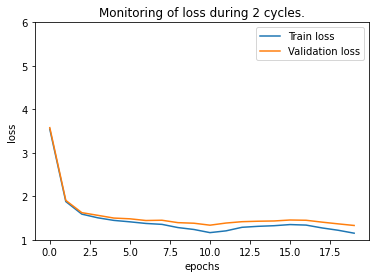

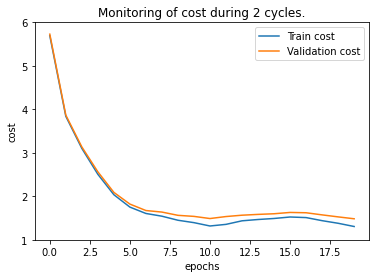

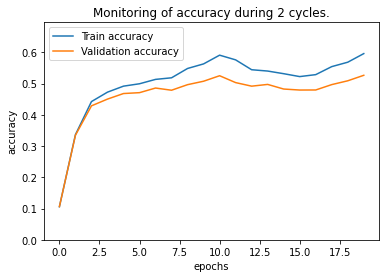

In [31]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"bn3"}
net = mlp.MLP.load_mlp(GDparams, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE, seed=42, lamda=0.005)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [119]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5329

100%|██████████| 20/20 [04:53<00:00, 14.70s/it]


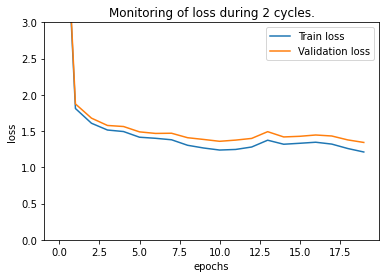

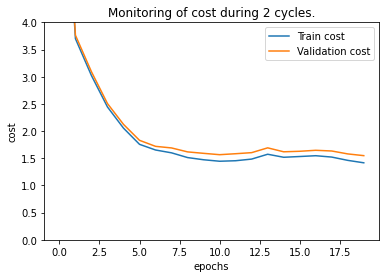

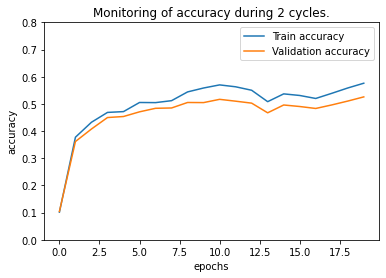

In [11]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10], batch_norm=False, init=mlp.Initialization.HE, seed=42)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"l3_s"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

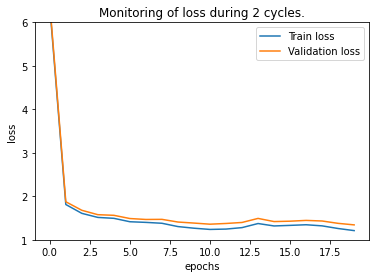

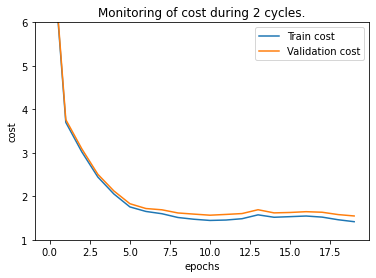

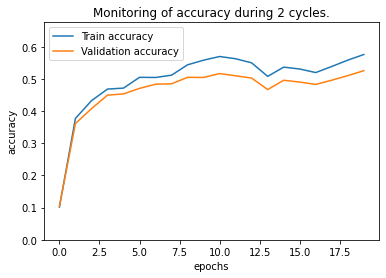

In [32]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"l3_s"}
net = mlp.MLP.load_mlp(GDparams, k=3, dims=[3072,50,50,10], batch_norm=False, init=mlp.Initialization.HE, seed=42, lamda=0.005)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [12]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5293

## 9 Layer network

100%|██████████| 20/20 [05:06<00:00, 15.33s/it]


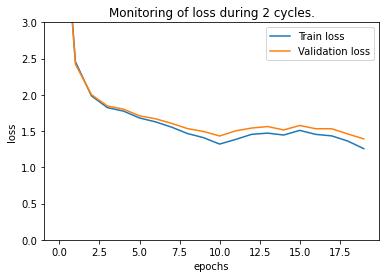

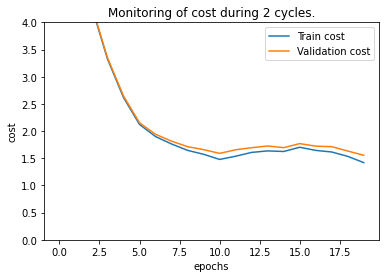

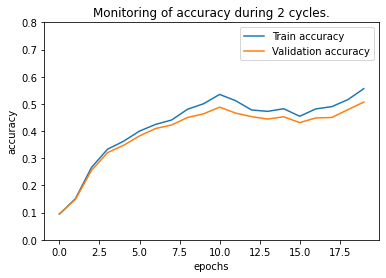

In [120]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"bn9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

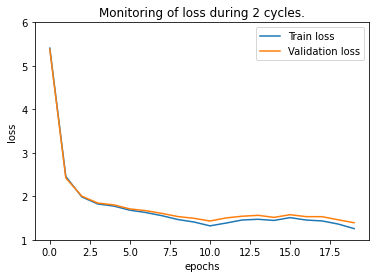

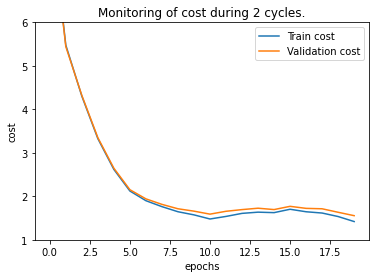

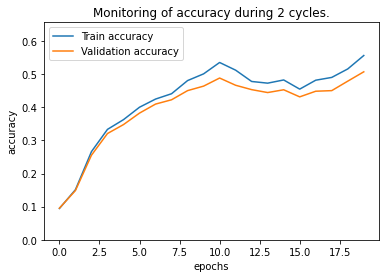

In [33]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"bn9"}
net = mlp.MLP.load_mlp(GDparams, lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [121]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5129

100%|██████████| 20/20 [04:39<00:00, 13.98s/it]


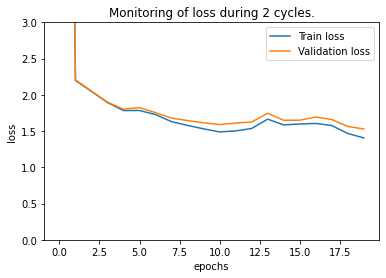

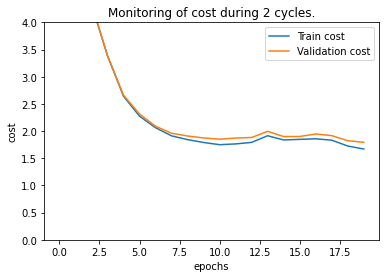

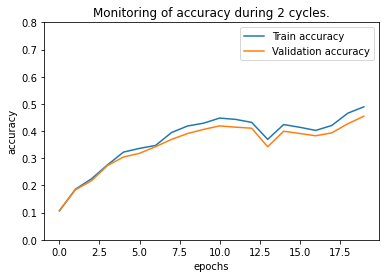

In [13]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10], batch_norm=False, init=mlp.Initialization.HE, seed=42)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"l9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

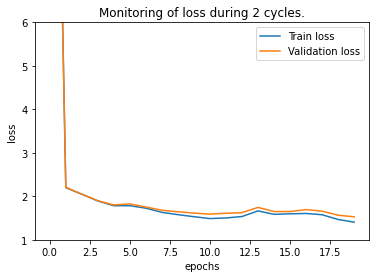

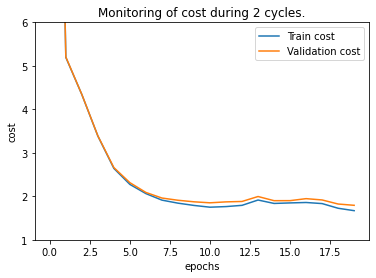

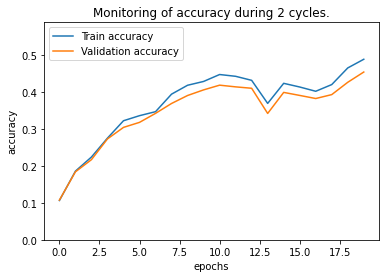

In [34]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"l9"}
net = mlp.MLP.load_mlp(GDparams, lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10], batch_norm=False, init=mlp.Initialization.HE, seed=42)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [14]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.4635

# Coarse-to-fine Search
## Coarse search

In [136]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"coarse_search_bn3"}
search = mlp.Search(l_min=-5, l_max=-1, n_lambda=20)
search.random_search(data_5000, GDparams, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE)


100%|██████████| 20/20 [05:32<00:00, 16.60s/it]


In [138]:
lams = np.save('History/lamdas_coarse  .npy', search.lambdas)

In [140]:
importlib.reload(mlp)
lams = np.load('History/lamdas_coarse.npy')
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"coarse_search_bn3"}
search = mlp.Search(l_min=-5, l_max=-1,   n_lambda=20)
search.random_search_perf(GDparams, lams, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE)

0.0067966 & 58.03778 & 52.88 \\
0.002481 & 61.18 & 52.26 \\
0.0025378 & 60.85333 & 52.04 \\
0.0084718 & 57.38667 & 51.72 \\
0.0012561 & 62.13556 & 51.46 \\
0.0005343 & 62.66222 & 51.28 \\
0.0001462 & 62.42889 & 51.28 \\
0.0003149 & 62.30889 & 51.06 \\
4.21e-05 & 62.34667 & 51.02 \\
1.21e-05 & 62.42222 & 50.88 \\
4.21e-05 & 62.3 & 50.86 \\
5.42e-05 & 62.39778 & 50.76 \\
5.34e-05 & 62.41333 & 50.58 \\
1.71e-05 & 62.06667 & 50.5 \\
7.07e-05 & 62.26222 & 50.44 \\
0.0001648 & 62.08889 & 50.28 \\
0.0213683 & 52.96222 & 49.6 \\
0.0291544 & 51.13556 & 48.08 \\
0.0635122 & 47.07556 & 45.58 \\
0.0757948 & 46.34667 & 45.48 \\


## Fine Search

In [141]:
importlib.reload(mlp)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"fine_search_bn3"}
search = mlp.Search(l_min=0.001, l_max=0.01, n_lambda=25, sample=False)
search.random_search(data_5000, GDparams, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE)

100%|██████████| 30/30 [07:46<00:00, 15.56s/it]


In [142]:
importlib.reload(mlp)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"fine_search_bn3"}
search = mlp.Search(l_min=0.001, l_max=0.01, n_lambda=25, sample=False)
search.random_search_perf(GDparams)

0.004 & 61.67556 & 53.5 \\
0.004375 & 60.87333 & 53.5 \\
0.0025 & 63.24889 & 53.22 \\
0.00325 & 62.16667 & 53.16 \\
0.0055 & 60.04444 & 53.14 \\
0.003625 & 62.04889 & 53.1 \\
0.008875 & 57.79556 & 53.0 \\
0.00625 & 59.36889 & 52.94 \\
0.002125 & 63.43556 & 52.9 \\
0.007 & 58.89333 & 52.84 \\
0.005125 & 60.37333 & 52.78 \\
0.006625 & 59.17556 & 52.78 \\
0.00475 & 61.10222 & 52.76 \\
0.002875 & 62.69778 & 52.44 \\
0.005875 & 59.75556 & 52.44 \\
0.00925 & 57.47111 & 52.4 \\
0.008125 & 57.82667 & 52.38 \\
0.007375 & 58.83778 & 52.32 \\
0.0085 & 57.98889 & 52.32 \\
0.00175 & 63.98444 & 52.3 \\
0.009625 & 57.09556 & 52.3 \\
0.00775 & 58.36 & 52.22 \\
0.01 & 56.85778 & 51.9 \\
0.001375 & 64.50889 & 51.72 \\
0.001 & 65.03778 & 51.68 \\


## Fine Search 2

In [ ]:
importlib.reload(mlp)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"fine_search2_bn3"}
search = mlp.Search(l_min=2*1e-5, l_max=9*1e-5, n_lambda=6, sample=False)
search.random_search(data_5000, GDparams, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)

In [ ]:
importlib.reload(mlp)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"fine_search2_bn3"}
search = mlp.Search(l_min=2*1e-5, l_max=9*1e-5, n_lambda=6, sample=False)
search.random_search_perf(GDparams)

# Best Classifier

100%|██████████| 30/30 [07:23<00:00, 14.78s/it]


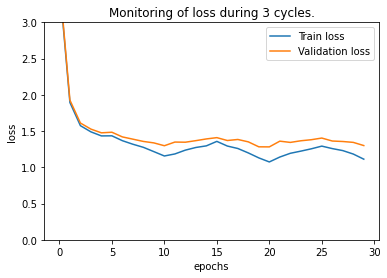

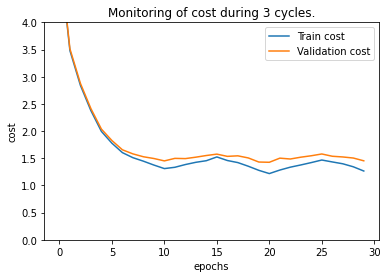

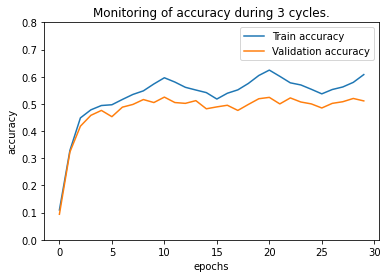

In [10]:
importlib.reload(mlp)
best = mlp.MLP(lamda=0.004, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*49000//100, "freq":10, "exp":"best"}
best.cyclic_learning(data_1000, GDparams, verbose=True, backup=True)
best.plot_metric(GDparams, metric="loss")
best.plot_metric(GDparams, metric="cost")
best.plot_metric(GDparams, metric="accuracy")

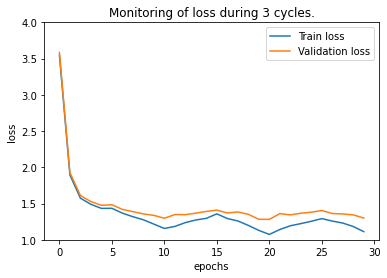

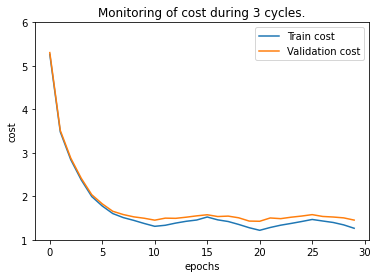

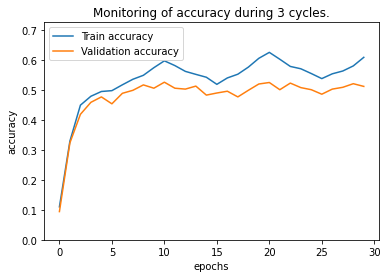

In [36]:
importlib.reload(mlp)
GDparams = {"n_cycles":3, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*49000//100, "freq":10, "exp":"best"}
net = mlp.MLP.load_mlp(GDparams, lamda=0.004, k=3, dims=[3072,50,50,10], batch_norm=True, init=mlp.Initialization.HE, seed=42)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy") 

In [9]:
best.compute_accuracy(data_1000["X_test"], data_1000["y_test"])

0.5427

# Sensitivity to initialization

100%|██████████| 20/20 [04:46<00:00, 14.35s/it]
0.1-bn, train_acc:0.5933555555555555 | val_acc:0.5284 | test_acc:0.5335
0.1 & yes & 0.5933555555555555 & 0.5284 & 0.5335 \\


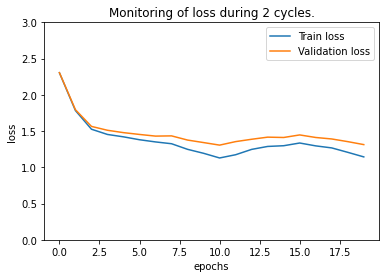

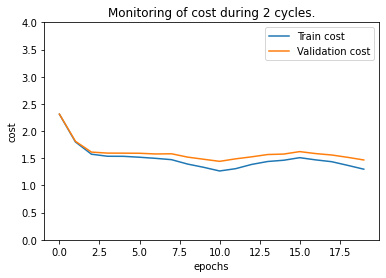

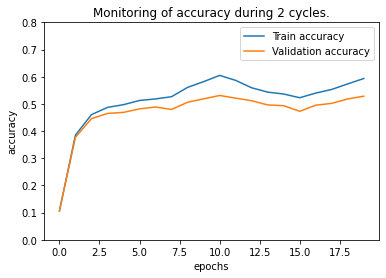

100%|██████████| 20/20 [04:26<00:00, 13.31s/it]
0.1-l, train_acc:0.5731555555555555 | val_acc:0.5248 | test_acc:0.5317
0.1 & no & 0.5731555555555555 & 0.5248 & 0.5317 \\


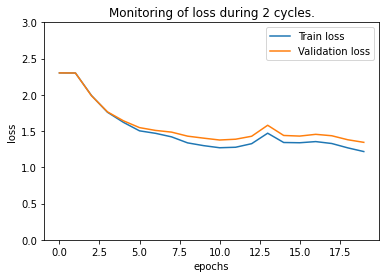

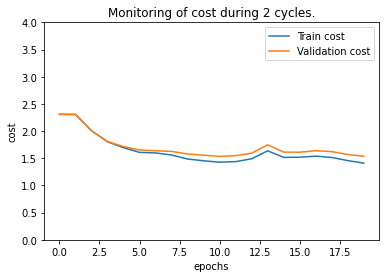

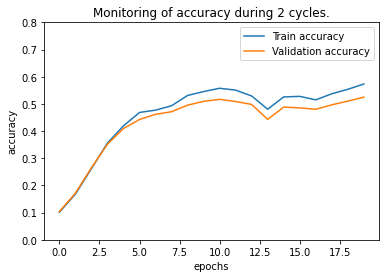

100%|██████████| 20/20 [04:39<00:00, 13.97s/it]
0.001-bn, train_acc:0.5969111111111111 | val_acc:0.5302 | test_acc:0.5354
0.001 & yes & 0.5969111111111111 & 0.5302 & 0.5354 \\


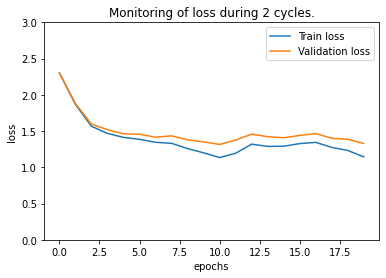

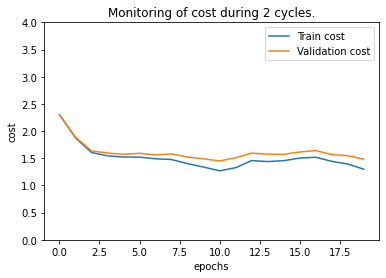

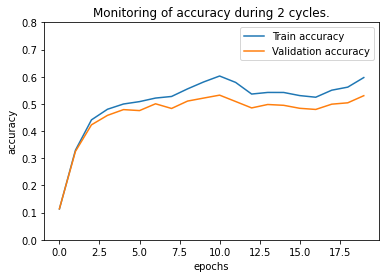

100%|██████████| 20/20 [04:26<00:00, 13.34s/it]
0.001-l, train_acc:0.10113333333333334 | val_acc:0.0898 | test_acc:0.1
0.001 & no & 0.10113333333333334 & 0.0898 & 0.1 \\


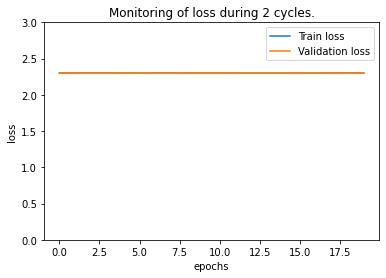

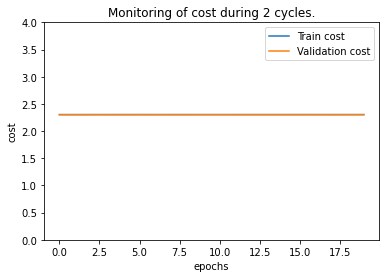

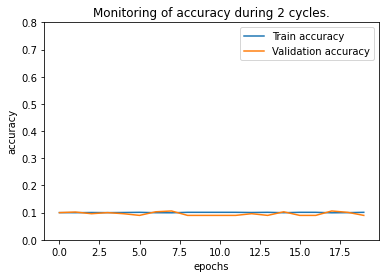

100%|██████████| 20/20 [04:40<00:00, 14.04s/it]
0.0001-bn, train_acc:0.5976 | val_acc:0.533 | test_acc:0.5386
0.0001 & yes & 0.5976 & 0.533 & 0.5386 \\


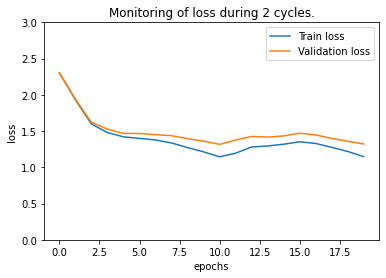

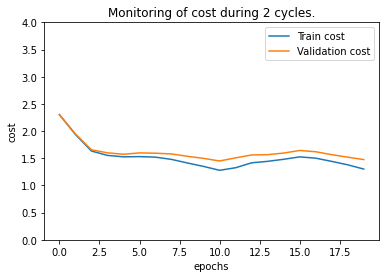

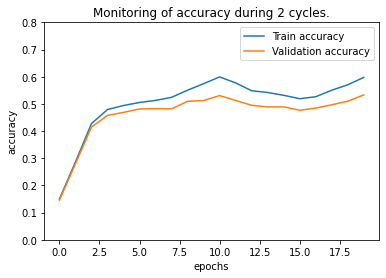

100%|██████████| 20/20 [04:32<00:00, 13.62s/it]
0.0001-l, train_acc:0.10113333333333334 | val_acc:0.0898 | test_acc:0.1
0.0001 & no & 0.10113333333333334 & 0.0898 & 0.1 \\


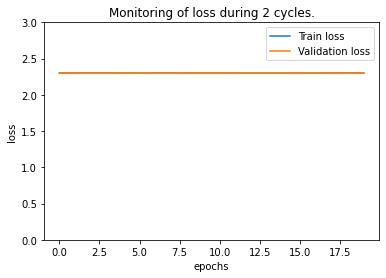

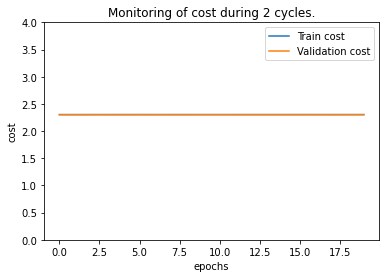

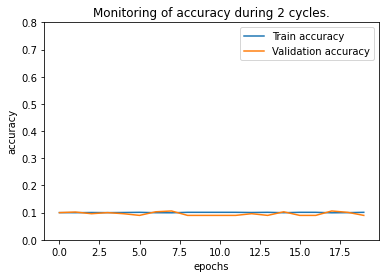

In [131]:
importlib.reload(mlp)
sigmas = [1e-1, 1e-3, 1e-4]
bn = [True, False]
for sigma in sigmas:
    for b in bn:
        net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10], batch_norm=b, init=sigma, seed=42)
        exp = f"bn3_{sigma}" if b else f"l3_{sigma}"
        GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":exp}
        net.cyclic_learning(data_5000, GDparams, verbose=False, backup=True)
        acc = net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])
        print(f"{sigma}-{'bn' if b else'l'}, train_acc:{net.train_acc[-1]} | val_acc:{net.val_acc[-1]} | test_acc:{acc}")
        print(f"{sigma} & {'yes' if b else'no'} & {net.train_acc[-1]} & {net.val_acc[-1]} & {acc} \\\\")
        net.plot_metric(GDparams, metric="loss")
        net.plot_metric(GDparams, metric="cost")
        net.plot_metric(GDparams, metric="accuracy")